# Loan Default Prediction Model
This notebook aims to predict loan default outcomes based on historical loan data. The approach includes data preprocessing, model training, and evaluation using a neural network in TensorFlow. 

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset and set display options
loan = pd.read_csv('../.Database/merged_cleaned_loan.csv')
pd.set_option('display.max_columns', None)


## Data Preprocessing

To prepare our dataset, we will:
1. Drop non-numerical and irrelevant columns.
2. Separate the target variable (loan status) from the features.
3. Identify numerical and categorical features for encoding and scaling.


In [2]:
# Drop non-numerical and target columns from features
X = loan.drop(columns=['addr_state', 'emp_title', 'loan_status', 'issue_d', 'issue_y', 'issue_m', 'title'])

# Replace 'annual_inc' with its logarithmic version 'log_annual_inc' for normalization purposes
X = X.drop(columns=['annual_inc'])

# Remove outcome-related columns that would otherwise leak information
X = X.drop(columns=['loan_status_grouped', 'grade', 'sub_grade', 'int_rate'])

# Select the target variable for prediction
y = loan['loan_status_grouped']


## Feature Engineering

We'll now split the columns into numerical and categorical types. Categorical variables will be one-hot encoded, and numerical variables will be scaled to improve model performance.



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define categorical and numerical feature lists
categorical_columns = ['home_ownership', 'term','purpose','emp_length']
numerical_columns = X.select_dtypes(include=['float64']).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Ensure alignment of train and test sets to handle any potential dummy variable mismatch
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Scale numerical columns to standardize the data distribution
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

## Neural Network Model

We'll now define a neural network using TensorFlow's Keras API. This network has multiple dense layers with ReLU activation, optimized for classification.

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(25, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 output classes for multi-class classification

])

### Compile and Train the Model
The model is compiled with `sparse_categorical_crossentropy` loss suitable for multi-class classification with integer labels, and then trained on the training data.

In [5]:
# Compile the model with Adam optimizer and appropriate loss for multi-class classification
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with training data and validate on a portion of the training set
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6480 - loss: 1718.1901 - val_accuracy: 0.7871 - val_loss: 1.5180
Epoch 2/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7531 - loss: 19.9313 - val_accuracy: 0.7871 - val_loss: 0.5181
Epoch 3/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7842 - loss: 0.5218 - val_accuracy: 0.7871 - val_loss: 0.5178
Epoch 4/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7839 - loss: 0.5221 - val_accuracy: 0.7871 - val_loss: 0.5179
Epoch 5/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7848 - loss: 0.5209 - val_accuracy: 0.7871 - val_loss: 0.5177
Epoch 6/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7837 - loss: 0.5223 - val_accuracy: 0.7871 - val_loss: 0.5179
Epoch 7/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7862 - loss: 0.5192 - val_accuracy: 0.7871 - val_loss: 0.5180
Epoch 8/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7850 - los

## Model Evaluation

After training, the model is evaluated on the test set. We'll predict classes, generate a classification report, and plot a confusion matrix for performance visualization.


In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

1612/1612 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7834 - loss: 0.5233
Test accuracy: 0.7822173833847046


1612/1612 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


C:\Users\kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     40328
         1.0       0.00      0.00      0.00     11228

    accuracy                           0.78     51556
   macro avg       0.39      0.50      0.44     51556
weighted avg       0.61      0.78      0.69     51556



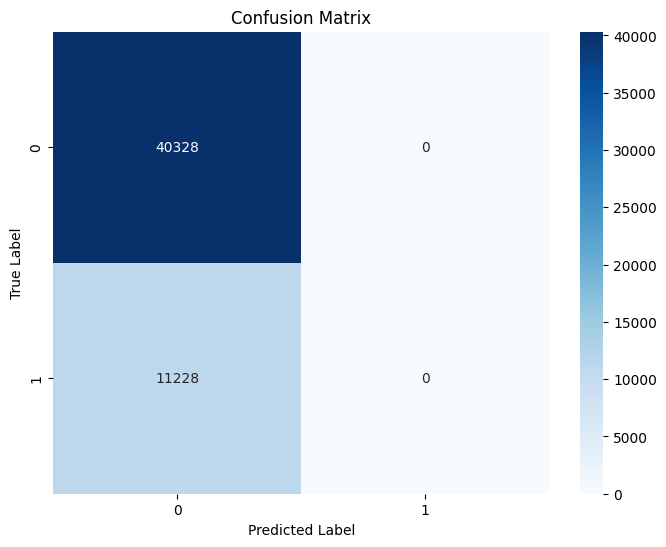

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class probabilities and convert them to class labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred_classes)
print(classification_report(y_test, y_pred_classes))

# Plot confusion matrix as a heatmap for visual assessment of model performance
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
